In [ ]:
# import libraries

import datetime as dt
import yfinance as yf
import numpy as np
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected=True)
np.random.seed(42)

# define the volatility plotting function taking inputs of ticker and times

def plot_volatility(tickers, start_date, end_date):
    # Create the data frame of prices with start and end dates 
    df = yf.download(tickers, start=start_date, end=end_date)
    # define the variable 'close' as the variable in the dataframe column 'close'
    close = df['Close']
    
    # Compute log returns
    log_returns = np.log(close / close.shift(1)).dropna()

    # Calculate daily standard deviation of returns
    daily_std = log_returns.std()
    annualized_std = daily_std * np.sqrt(252)

    # Plot histogram of log returns with annualized volatility
    fig = make_subplots(rows=len(tickers), cols=1, shared_xaxes=True, vertical_spacing=0.05)
    for i, ticker in enumerate(tickers):
        trace = go.Histogram(x=log_returns[ticker], name=ticker)
        fig.add_trace(trace, row=i+1, col=1)

        fig.update_xaxes(title_text=f'{ticker} Annualized Volatility: {np.round(annualized_std[ticker]*100, 1)}%', row=i+1, col=1)
        fig.update_yaxes(title_text='Frequency', row=i+1, col=1)

        fig.update_layout(autosize=False, width=700, height=400*len(tickers),
                          title='Frequency of log returns',
                          xaxis=dict(title='Annualized Volatility'))

    fig.show(renderer="colab")

     # Plot rolling volatility
    TRADING_DAYS = 60
    volatility = log_returns.rolling(window=TRADING_DAYS).std()*np.sqrt(TRADING_DAYS)
    volatility.plot().update_layout(autosize=False, width=600, height=300, title_text="Rolling Volatility", title_font=dict(size=18), xaxis_title="Date", yaxis_title="Volatility", xaxis=dict(tickfont=dict(size=10)), yaxis=dict(tickfont=dict(size=10)))
    
    pyo.iplot(fig, filename='volatility_histograms')
    pyo.iplot(volatility, filename='rolling_volatility')
    fig.show(renderer="colab")


# Call the function

[*********************100%***********************]  4 of 4 completed


AttributeError: ignored

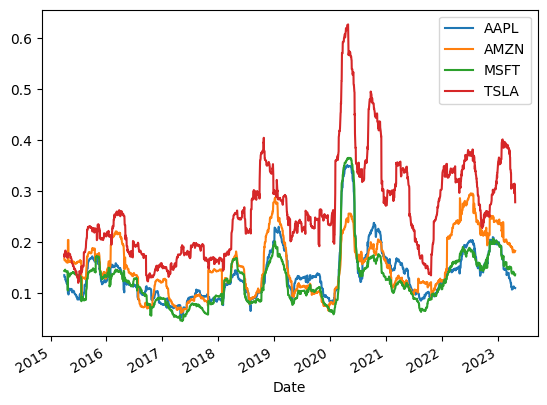

In [ ]:
plot_volatility(['AAPL', 'MSFT', 'TSLA', 'AMZN'], dt.datetime(2015, 1, 1), dt.datetime.now())